# Exploratory data analysis (EDA) on Haberman dataset

### Objective: 
   Classify a new patient as belonging to one of the 2 classes given the 3 features.
### About the Dataset:
   The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


### Attribute Information:
* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


### Domain related details:
* When cancer has spread to the axillary lymph nodes, the nodes may feel enlarged, or there may be a noticeable lump.
* A breast cancer prognosis is better when the cancer is only in the breast, and the lymph nodes are not affected.
* Also, if the cancer has spread to the axillary lymph nodes, a doctor will usually recommend removing the lymph nodes during the surgery to remove the originating tumor.

# Dataset Details

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore") 


#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [2]:
# Let's see how many data-points and features are present.
print (haberman.shape)

(306, 4)


In [3]:
# Let's see what are the column names in our dataset?
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
# As we know status column is numeric, from Attribute Information section.
# lets change the status so that it will be more readable 

haberman['status'] = haberman['status'].replace(1,'survived')
haberman['status'] = haberman['status'].replace(2,'dead')
haberman['status'].tail()

301    survived
302    survived
303    survived
304        dead
305        dead
Name: status, dtype: object

In [5]:
# Now, let's see how many patient survived 5 years or longer and how many less than that.
haberman["status"].value_counts()

survived    225
dead         81
Name: status, dtype: int64

* haberman data set is an imbalanced dataset as the number of data points for each class is not same.

# 2-D Scatter Plot

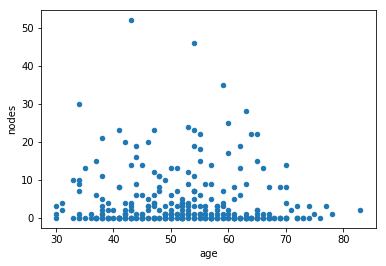

In [6]:
haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.show()

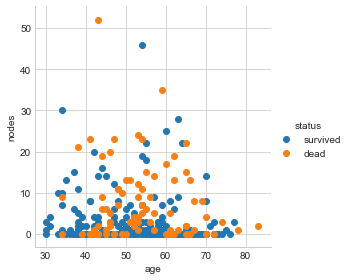

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

**Observation:**
   * Using nodes and age features, predecting a patients survival is harder as they are overlapping.
   * The blue points and orange points cannot be easily seperated.

#  Pair-plot

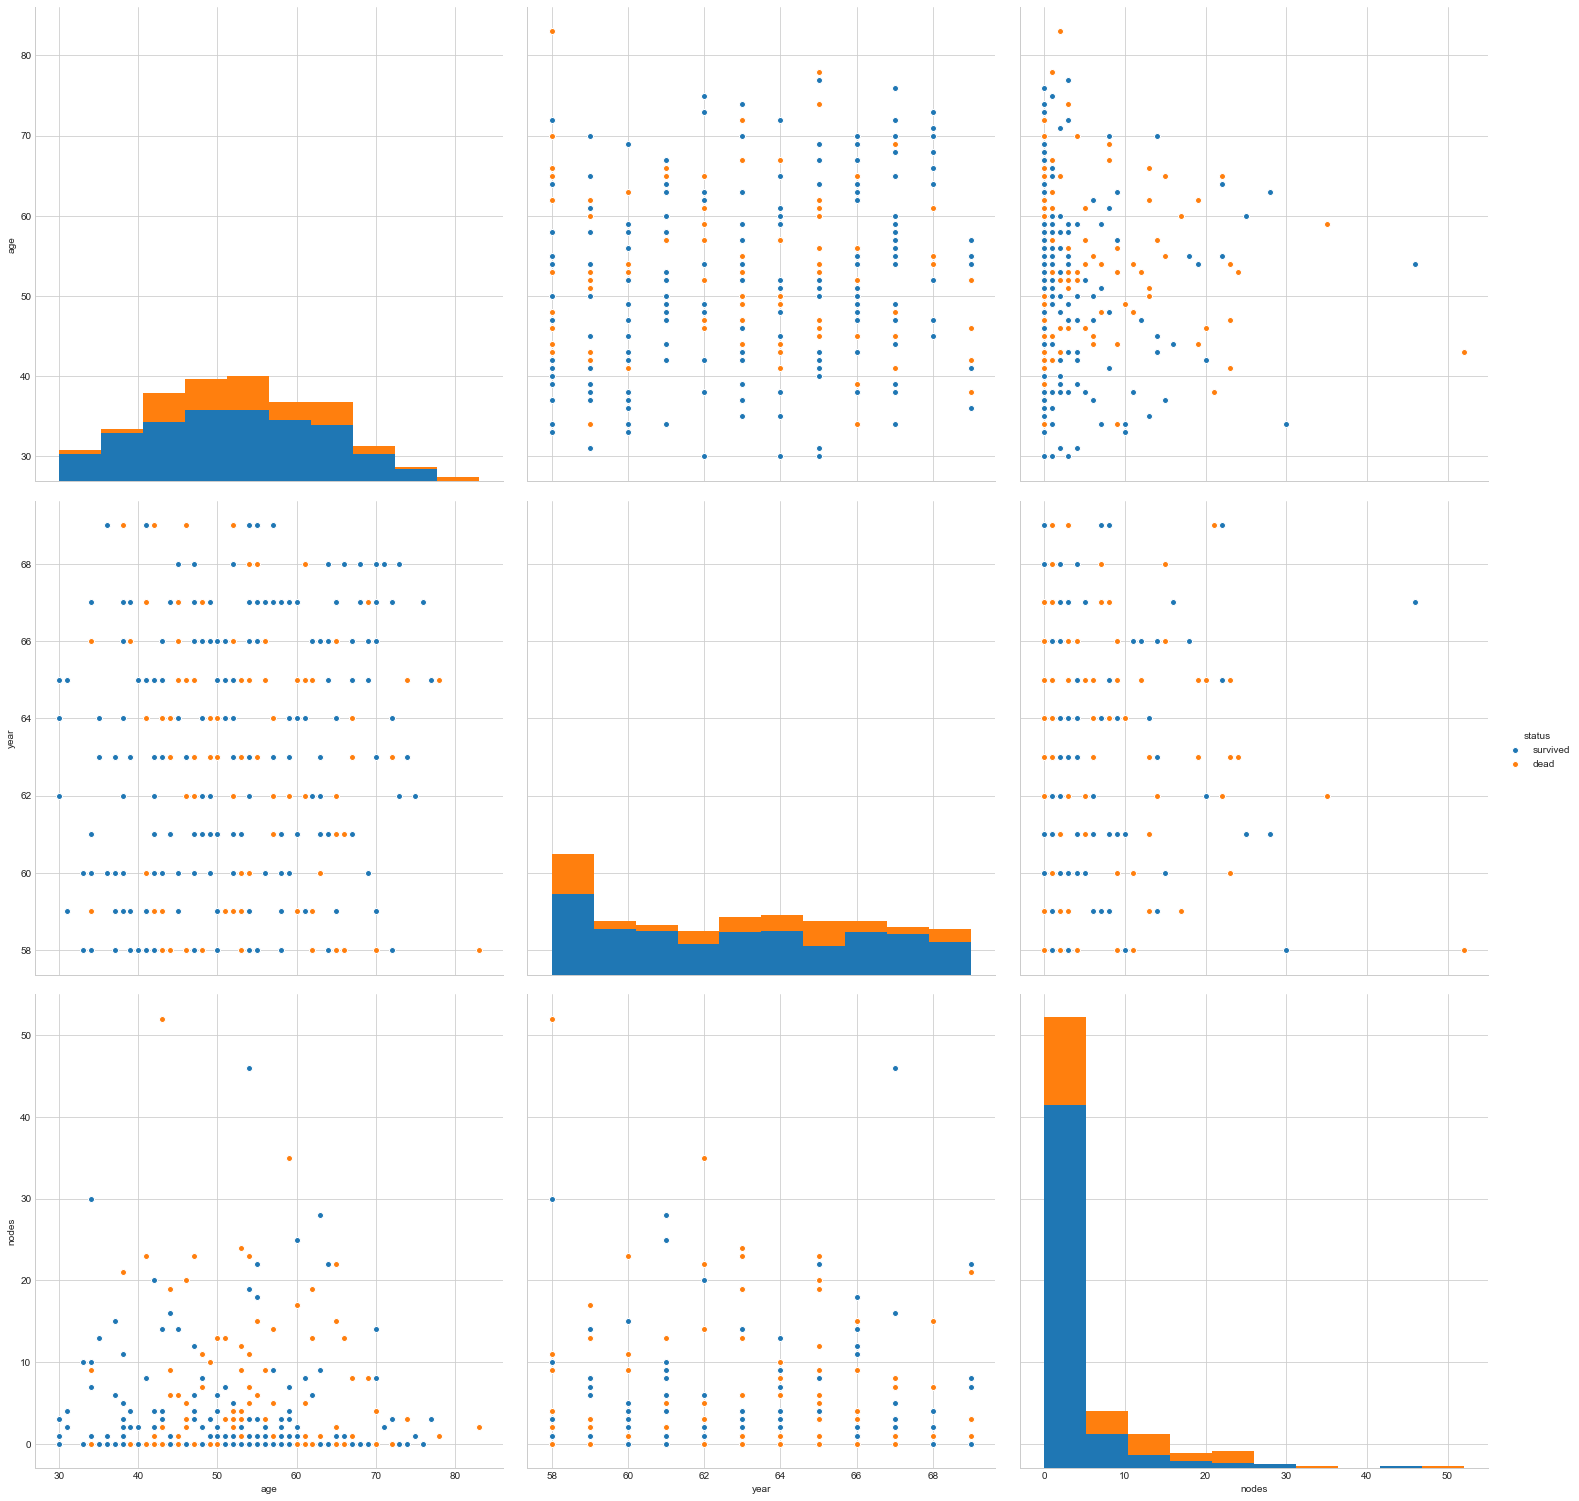

In [8]:
# Let's look at the pair-plot now, It gives best understanding about the features.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=7);
plt.show()

**Observation :**

1. Patients of age between 40 and 70, death count is more that survival.
2. Patients of age greater than 50 and has more than 10 nodes are more likely to die.
3. No pair of features are best to classify the survival.
4. The scatter of points are overlapping in all the pair plots.

# Histogram, PDF, CDF

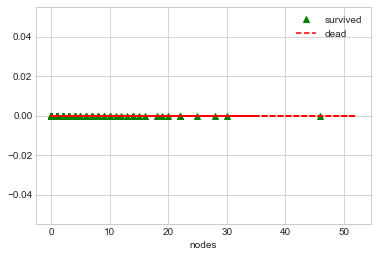

In [9]:
#Let's look at 1-D scatter plot of node

import numpy as np
haberman_survived = haberman.loc[haberman["status"] == "survived"];
haberman_dead = haberman.loc[haberman["status"] == "dead"];

plt.plot(haberman_survived['nodes'], np.zeros_like(haberman_survived['nodes']), 'g^')
plt.plot(haberman_dead['nodes'], np.zeros_like(haberman_dead['nodes']), 'r--')
plt.xlabel('nodes')
plt.legend(['survived','dead'])
plt.show()

**Observation:** Patients with nodes morethan 31 are more likely to die 

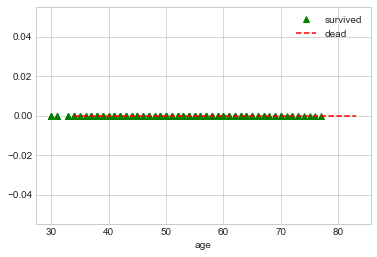

In [10]:
#Let's look at 1-D scatter plot of node

plt.plot(haberman_survived['age'], np.zeros_like(haberman_survived['age']), 'g^')
plt.plot(haberman_dead['age'], np.zeros_like(haberman_dead['age']), 'r--')
plt.xlabel('age')
plt.legend(['survived','dead'])
plt.show()


**Observation:** 
1. Patients whose age is morethan 78 are more likely to die.
2. Patients whose age is lessthan 33 are more likely to survive.

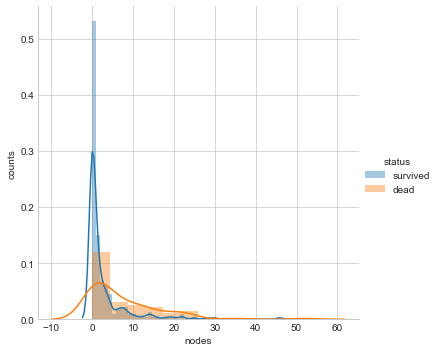

In [11]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.ylabel('counts')
plt.show();



**Observation:** 
1. People with 0 to 2 nodes are more likely to servive.
2. People with nodes more than 3 are more likely to die.

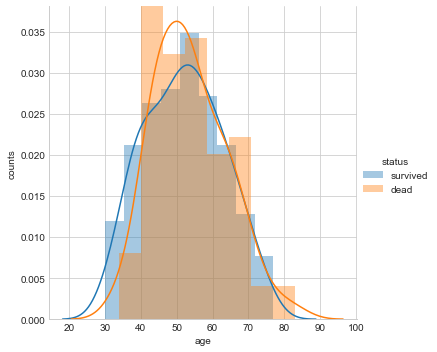

In [12]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel('counts')
plt.show();

**Observation:**
1. Patients from 42 to 58 years are more likely to die.
2. Patients below 42 are more likely to survive.
3. Patients from 58 to 76 years are having same chances to survive and die.
4. Patients morethan 76 years are more likely to be dead.

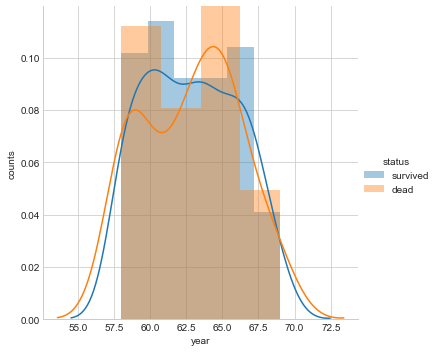

In [13]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.ylabel('counts')
plt.show();

**Year of operation is not needed to predict for a new patient. It is not a good idea to classify based on the year of operation. because it is nowhere related to cancer.**

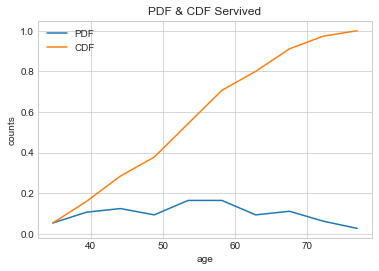

In [14]:
counts, bin_edges = np.histogram(haberman_survived['age'], bins=10, density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
plt.title('PDF & CDF Servived')
plt.xlabel('age')
plt.ylabel('counts')
plt.legend(['PDF','CDF'])
plt.show();


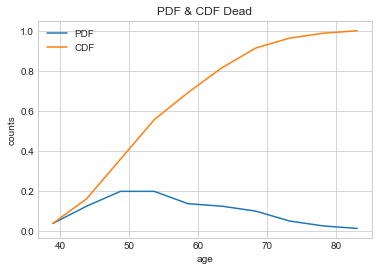

In [15]:
#Plot CDF of nodes

counts, bin_edges = np.histogram(haberman_dead['age'], bins=10, density = True)
pdf = counts/(sum(counts))

# CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('PDF & CDF Dead')
plt.xlabel('age')
plt.ylabel('counts')
plt.legend(['PDF','CDF'])


plt.show();

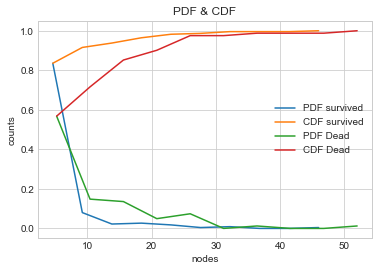

In [16]:
counts, bin_edges = np.histogram(haberman_survived['nodes'], bins=10, density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_dead['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('PDF & CDF')
plt.xlabel('nodes')
plt.ylabel('counts')
plt.legend(['PDF survived','CDF survived','PDF Dead','CDF Dead'])

plt.show();

# Mean, Variance and Std-dev

In [17]:
print("Nodes Means:")
print('Survived Patients',np.mean(haberman_survived["nodes"]))
print('Dead Patients',np.mean(haberman_dead["nodes"]))

print("\nNodes Std-dev:");
print('Survived Patients',np.std(haberman_survived["nodes"]))
print('Dead Patients',np.std(haberman_dead["nodes"]))

print("\nage Means:")
print('Survived Patients',np.mean(haberman_survived["age"]))
print('Dead Patients',np.mean(haberman_dead["age"]))

print("\nage Std-dev:");
print('Survived Patients',np.std(haberman_survived["age"]))
print('Dead Patients',np.std(haberman_dead["age"]))

Nodes Means:
Survived Patients 2.7911111111111113
Dead Patients 7.45679012345679

Nodes Std-dev:
Survived Patients 5.857258449412131
Dead Patients 9.128776076761632

age Means:
Survived Patients 52.01777777777778
Dead Patients 53.67901234567901

age Std-dev:
Survived Patients 10.98765547510051
Dead Patients 10.10418219303131


# Median, Percentile, Quantile, IQR, MAD

In [18]:
from statsmodels import robust

print("\nNodes Medians:")
print('Survived Patients',np.median(haberman_survived["nodes"]))
print('Dead Patients',np.median(haberman_dead["nodes"]))

print ("\nNodes Median Absolute Deviation")
print('Survived Patients',robust.mad(haberman_survived["nodes"]))
print('Dead Patients',robust.mad(haberman_dead["nodes"]))


print("\nAge Medians:")
print('Survived Patients',np.median(haberman_survived["age"]))
print('Dead Patients',np.median(haberman_dead["age"]))

print ("\nAge Median Absolute Deviation")
print('Survived Patients',robust.mad(haberman_survived["age"]))
print('Dead Patients',robust.mad(haberman_dead["age"]))

print("\nNode Quantiles:")
print('Survived Patients',np.percentile(haberman_survived["nodes"],np.arange(0, 100, 25)))
print('Dead Patients','Dead Patients','Dead Patients','Dead Patients',np.percentile(haberman_dead["nodes"],np.arange(0, 100, 25)))

print("\nNode 90th Percentiles:")
print('Survived Patients',np.percentile(haberman_survived["nodes"],90))
print('Dead Patients','Dead Patients','Dead Patients',np.percentile(haberman_dead["nodes"], 90))

print("\nAgeQuantiles:")
print('Survived Patients',np.percentile(haberman_survived["age"],np.arange(0, 100, 25)))
print('Dead Patients','Dead Patients',np.percentile(haberman_dead["age"],np.arange(0, 100, 25)))

print("\nAge 90th Percentiles:")
print('Survived Patients',np.percentile(haberman_survived["age"],90))
print('Dead Patients',np.percentile(haberman_dead["age"], 90))




Nodes Medians:
Survived Patients 0.0
Dead Patients 4.0

Nodes Median Absolute Deviation
Survived Patients 0.0
Dead Patients 5.930408874022408

Age Medians:
Survived Patients 52.0
Dead Patients 53.0

Age Median Absolute Deviation
Survived Patients 13.343419966550417
Dead Patients 11.860817748044816

Node Quantiles:
Survived Patients [0. 0. 0. 3.]
Dead Patients Dead Patients Dead Patients Dead Patients [ 0.  1.  4. 11.]

Node 90th Percentiles:
Survived Patients 8.0
Dead Patients Dead Patients Dead Patients 20.0

AgeQuantiles:
Survived Patients [30. 43. 52. 60.]
Dead Patients Dead Patients [34. 46. 53. 61.]

Age 90th Percentiles:
Survived Patients 67.0
Dead Patients 67.0


# Box plot and Whiskers

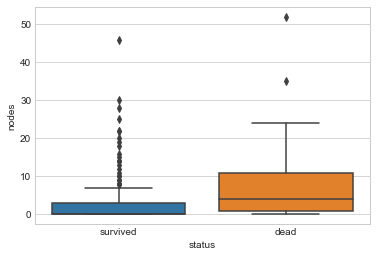

In [19]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

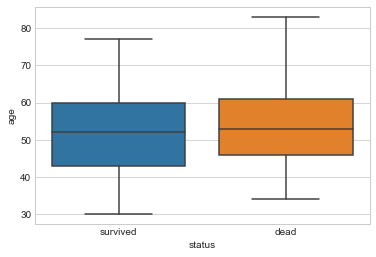

In [20]:
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

# Violin plots

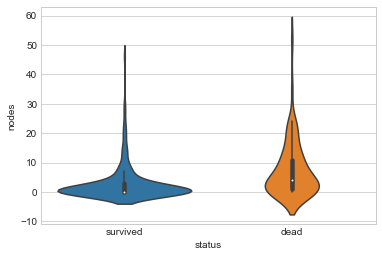

In [21]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

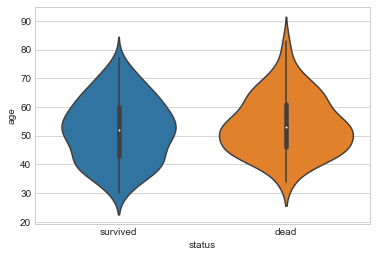

In [22]:
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.show()

# Summarizing plots:

* The classification of a patient can be done using nodes and age of the patient.
* Though the accuracy of the predicton cannot be great with these features, they more sensible than the rest.
* The year of operation is not helpfull in the predection as those are past dates, and never used for future.
* Haberman data set is an imbalanced dataset as the number of data points for each class is not same.
* Patients of age between 40 and 70, death count is more that survival.
* Patients of age greater than 50 and has more than 10 nodes are more likely to die.
* Patients from 42 to 58 years are more likely to die.
* Patients whose age is morethan 78 are more likely to die.
* Patients whose age is lessthan 33 are more likely to survive.
* People with 0 to 2 nodes are more likely to servive.
* People with nodes more than 3 are more likely to die.
* Patients below 42 are more likely to survive.
* Patients from 58 to 76 years are having same chances to survive and die.
* Patients more than 76 years are more likely to be dead.